In [250]:
# Import the neccesary modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


## Being on with the data👨🏿‍🍳
Understanding the data plays a crucial role in any analysis.This project will use the Aviation data from kaggle dataset. For the Aviation data we will investigate various factors to get an idea of the business understanding:
* Getting the dimension of the data
* Understand the various variables in our data
* Data Cleaning
  > Check for missing data

  > Check for duplicates

  > Format columns

  > Drop columns
* Data Visualization
  > Explore the various variables by using visuals and try to communicate
  
  > Check for normality,outliers,spread,measure of tendency in the numeric variable 




In [161]:
# Import data
Aviation_data = pd.read_csv('data/Aviation_Data.csv')
#View the first 5 values
Aviation_data.head()


c:\Users\savin\anaconda3\envs\learn-env\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (6,7,28) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.9222,-81.8781,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [4]:
# Check the shape of the data
Aviation_data.shape

(90348, 31)

In [5]:
# Get the info of the data
Aviation_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      90348 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

The data is composed of 2 data types 
``dtypes: float64(5), object(26)``

Presence of missing data 

## Data cleaning

### Numerical Variables

In [219]:
# Numerical variables
numerical_df =Aviation_data.select_dtypes(include='number').copy()
numerical_df.sample(6,random_state=42)

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
83358,1.0,1.0,0.0,0.0,0.0
1956,1.0,0.0,1.0,0.0,0.0
73015,1.0,1.0,0.0,0.0,0.0
87197,1.0,0.0,0.0,0.0,1.0
81246,1.0,0.0,0.0,0.0,2.0
43329,1.0,0.0,0.0,0.0,2.0


In [100]:
# Check for missing data
numerical_df.shape
numerical_df.isna().sum().sort_values(ascending=False) # 

Total.Serious.Injuries    13969
Total.Minor.Injuries      13392
Total.Fatal.Injuries      12860
Number.of.Engines          7543
Total.Uninjured            7371
dtype: int64

Its evident from that our data has alot of missing data. To approch this case we can choose to use the following methods:
* Imputing missing data (median,mean,mode)
* Ignore the missing data
* Remove missing data
Deciding which method to use  relies on the understanding of the data and the business analysis being performed on the data

In [223]:
# Summary statistics
numerical_df.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,69635.000000,69635.000000,69635.000000,69635.000000,69635.000000
mean,1.147167,0.420335,0.229568,0.295441,4.291046
std,0.445396,3.141745,1.197071,1.348845,24.090688
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,270.000000,137.000000,125.000000,576.000000


In [103]:
numerical_df['Number.of.Engines'].mean().__round__(0)

1.0

Something worth noting is how the variables are distributed there appears:
* Outliers maybe present in the some of the variables
* A hunch the variables are not normally distributed (check on the distribution)

On the matter of choosing to impute the variables at this point it is not advisable to use the measure of central tendency as they maybe misleading to support this let's perform some visualization and try to understand how the central tendency are distributed in the data

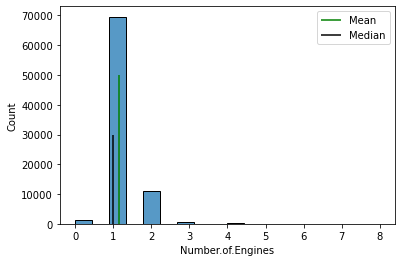

In [45]:
# Visualization
ax =sns.histplot(data=numerical_df, x="Number.of.Engines")
ax.vlines(x=numerical_df['Number.of.Engines'].mean(),color= 'green',ymax=50000,ymin=0,label='Mean')
ax.vlines(x=numerical_df['Number.of.Engines'].median(),color= 'black',ymax=30000,ymin=0,label='Median')
ax.legend()


The number of  accidents occurence over the years is it there a trend in the data

In [154]:

# Mean_Median plot function
def Mean_Median_plot(dataset):
    """ 
    Input(datset): Takes in a dataset 
    Returns: Boxplots of the numerical variables in the dataset
    """
    # Ensure it is numeric
    dataset = dataset.select_dtypes(include ='number')
    for i,col in enumerate(dataset.columns):
        plt.figure(i)
        sns.histplot(data=dataset, x=col)
        # ax.vlines(x=numerical_df[col].mean(),color= 'green',ymax=50000,ymin=0,label='Mean')
        # ax.vlines(x=numerical_df[col].median(),color= 'black',ymax=30000,ymin=0,label='Median')
        # ax.legend()


**Conclusion:** 
* Since we are not going to impute the missing values or ignore them as they can affect the analysis
we are going to drop them.
* For the outliers it is worth considering that events were recorded and thus data points should not be removed from the data
It also makes sense with the data as we expect the number of injuries/accidents to be fewer unless people won't be using airplanes as a form of transport


In [221]:
numerical_df.dropna(inplace=True)

In [222]:
numerical_df.shape

(69635, 5)

### Categorical Variables
Most of the variables in this dataset are objects


In [257]:
categorical_df = Aviation_data.select_dtypes(include='object')
categorical_df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Engine.Type,FAR.Description,Schedule,Purpose.of.flight,Air.carrier,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,Year
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Reciprocating,NaN,NaN,Personal,NaN,UNK,Cruise,Probable Cause,NaN,1948
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Reciprocating,NaN,NaN,Personal,NaN,UNK,Unknown,Probable Cause,19-09-1996,1962
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.9222,-81.8781,NaN,NaN,...,Reciprocating,NaN,NaN,Personal,NaN,IMC,Cruise,Probable Cause,26-02-2007,1974
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Reciprocating,NaN,NaN,Personal,NaN,IMC,Cruise,Probable Cause,12-09-2000,1977
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Personal,NaN,VMC,Approach,Probable Cause,16-04-1980,1979


In [212]:
categorical_df.shape

(90348, 26)

In [228]:
# Check for missing data
categorical_df.isna().sum().sort_values(ascending=False)

Schedule                 77766
Air.carrier              73700
FAR.Description          58325
Aircraft.Category        58061
Longitude                55975
Latitude                 55966
Airport.Code             40099
Airport.Name             37558
Broad.phase.of.flight    28624
Publication.Date         16689
Engine.Type               8536
Report.Status             7840
Purpose.of.flight         7651
Weather.Condition         5951
Aircraft.damage           4653
Registration.Number       2776
Injury.Severity           2459
Country                   1685
Amateur.Built             1561
Model                     1551
Make                      1522
Location                  1511
Accident.Number           1459
Event.Id                  1459
Event.Date                1459
Investigation.Type           0
Year                         0
dtype: int64

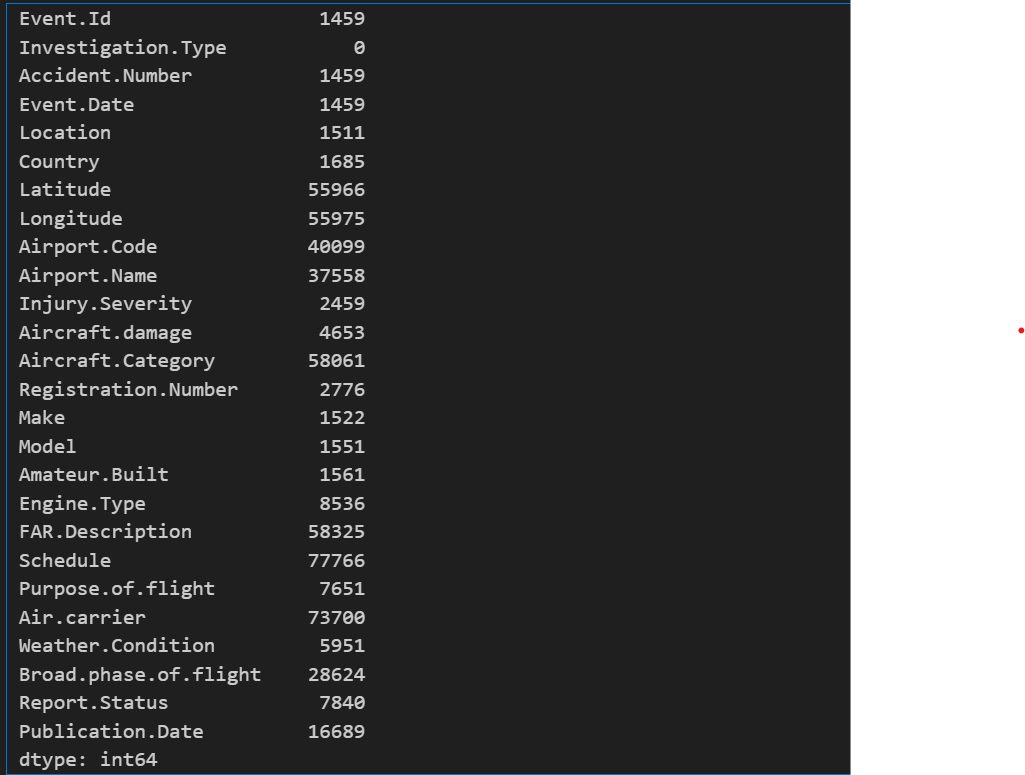

In [258]:
# Drop columns that have missing values more than 30% of the data 
categorical_df.drop(['Schedule','Air.carrier','FAR.Description',
                     'Longitude','Latitude',
                     'Airport.Code','Airport.Name'],axis =1,inplace=True)


c:\Users\savin\anaconda3\envs\learn-env\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [255]:
categorical_df.shape

(90348, 19)

Most of the variables have missing data except for the `Investigation Type`
Based on the objects we can partion the data objects into various features:

**Aircraft features:**
Make,Model,Ameteur.Built,AirCraft.Category

**Accident features:**
Weather.condition


In [236]:
# Using unique and value count methods to view some of the levels in the categorical variables
categorical_df['Investigation.Type'].unique()

categorical_df['Investigation.Type'].value_counts()
# Data cleaning is necessary for this variable as this is a binary data from

Accident      85015
Incident       3874
25-09-2020      702
26-09-2020       60
02-02-2021       39
              ...  
05-04-2021        1
04-03-2021        1
31-03-2021        1
05-01-2021        1
11-02-2021        1
Name: Investigation.Type, Length: 71, dtype: int64

In [ ]:
# Filter the data to only have the Accidents and Incidents
new_df=categorical_df[(categorical_df['Investigation.Type']=='Accident') |(categorical_df['Investigation.Type']=='Incident')]
new_df['Investigation.Type'].value_counts()

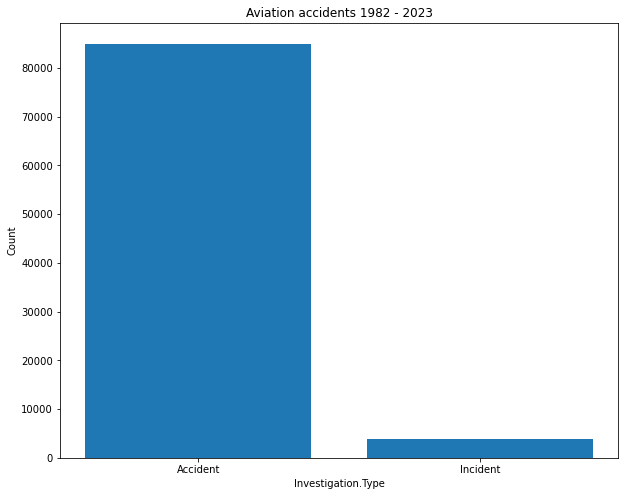

In [244]:
# Visualize
dty =new_df['Investigation.Type'].value_counts()
plt.figure(figsize=(10,8))
plt.bar(x=dty.index,height=dty.values)
plt.title('Aviation accidents 1982 - 2023')
plt.xlabel('Investigation.Type')
plt.ylabel('Count')
plt.show();

In [246]:
# 
categorical_df['Injury.Severity'].unique()

categorical_df['Injury.Severity'].value_counts().sort_values(ascending=False).head(10)
# Data cleaning would help by renaming all the Fatal levels to have three levels

Non-Fatal    67357
Fatal(1)      6167
Fatal         5262
Fatal(2)      3711
Incident      2219
Fatal(3)      1147
Fatal(4)       812
Fatal(5)       235
Minor          218
Serious        173
Name: Injury.Severity, dtype: int64

In [259]:
categorical_df['Aircraft.Category'].value_counts()

# categorical_df

Airplane             27617
Helicopter            3440
Glider                 508
Balloon                231
Gyrocraft              173
Weight-Shift           161
Powered Parachute       91
Ultralight              30
Unknown                 14
WSFT                     9
Powered-Lift             5
Blimp                    4
UNK                      2
Rocket                   1
ULTR                     1
Name: Aircraft.Category, dtype: int64

In [80]:
categorical_df['Make'].unique()
categorical_df['Make'].value_counts()

Cessna                          22227
Piper                           12029
CESSNA                           4922
Beech                            4330
PIPER                            2841
                                ...  
DONALD G STOKES                     1
Culver-revolution                   1
Arrow-Falcon Exporters, Inc.        1
GIPPSLAND                           1
Bice                                1
Name: Make, Length: 8237, dtype: int64

In [82]:
categorical_df['Engine.Type'].value_counts()
# Data cleaning combine the None and none

Reciprocating      69530
Turbo Shaft         3609
Turbo Prop          3391
Turbo Fan           2481
Unknown             2051
Turbo Jet            703
None                  19
Geared Turbofan       12
Electric              10
NONE                   2
LR                     2
Hybrid Rocket          1
UNK                    1
Name: Engine.Type, dtype: int64

In [266]:
# Combine the None and NONE for the engine type
categorical_df.loc[:,'Engine.Type'] = categorical_df['Engine.Type'].str.replace('NONE','None')

In [269]:
# Weather condition
categorical_df['Weather.Condition'].value_counts()
# Data cleaning to merge the Unknown weather conditions
categorical_df.loc[:,'Weather.Condition'] = categorical_df['Weather.Condition'].str.replace('UNK','Unk')

categorical_df['Weather.Condition'].value_counts()


c:\Users\savin\anaconda3\envs\learn-env\lib\site-packages\pandas\core\indexing.py:1783: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value


VMC    77303
IMC     5976
Unk     1118
Name: Weather.Condition, dtype: int64

In [268]:
new_df['Broad.phase.of.flight'].value_counts()

Landing        15428
Takeoff        12493
Cruise         10269
Maneuvering     8144
Approach        6546
Climb           2034
Taxi            1958
Descent         1887
Go-around       1353
Standing         945
Unknown          548
Other            119
Name: Broad.phase.of.flight, dtype: int64

In [272]:
categorical_df['Report.Status'].value_counts()
# Text analysis 
# loss engine power engine out "words"

Probable Cause                                                                                                                                                                                                                                   61754
Foreign                                                                                                                                                                                                                                           1999
<br /><br />                                                                                                                                                                                                                                       167
Factual                                                                                                                                                                                                                                            145
The pilot's 

In [ ]:
# Convert the Publication.Date to a date variable
categorical_df.loc[:,'Event.Date'] =pd.to_datetime(categorical_df['Event.Date'])


In [275]:
# Combine the numeical and categorical dataframes
Aviation_clean =numerical_df.join(categorical_df,how='inner')

In [277]:
# Get the shape of the data
Aviation_clean.shape

(69635, 25)

### Exploratory Data Analysis & Visualization

For this section we are interested in seeking the patterns in our data that aims to give us insights into the data we are analysing:
1. How are the Incidents and accidents distributed in terms of the category of the aircraft
2. Does the number of engines have any relationship with severity of an accident or Incident
3. What are the routes/Airports/Area that have terrible weather condition
4. Based on the report.status what type of engines/make/model had engine failures
5. What is the trend in the airport incidents 


In [162]:
Aviation_clean['Country'].value_counts()
# Since most of the accidents are occuring in the United States we can filter the data
Aviation_clean = Aviation_clean[Aviation_clean['Country']=='United States']

In [197]:
## We will keep the dates from 1980 as most os the observation are missing before this year
Final_data =Aviation_clean.loc[Aviation_clean['Publication.Date']>='1980-01-01']

In [184]:
# 1. Relationship between Incidents and accidents in terms of category of aircraft
cat_data =Final_data.groupby(['Aircraft.Category']).agg({'Investigation.Type':'count'})
cat_data.reset_index(inplace=True)
cat_data['Investigation_Percentage'] = [x/cat_data['Investigation.Type'].sum() for x in cat_data['Investigation.Type']]
cat_data.sort_values(by='Investigation.Type',ascending=False)

,Aircraft.Category,Investigation.Type,Investigation_Percentage
0,Airplane,19054,0.867945
5,Helicopter,2077,0.094611
3,Glider,312,0.014212
13,Weight-Shift,147,0.006696
4,Gyrocraft,136,0.006195
1,Balloon,115,0.005238
6,Powered Parachute,81,0.003690
10,Ultralight,16,0.000729
12,WSFT,9,0.000410
11,Unknown,2,0.000091


In [185]:
# 2. Does the number of engines have any relationship with severity of an accident or Incident
dat_Eng=Final_data.groupby('Number.of.Engines').agg({'Investigation.Type':'count'}).reset_index()
dat_Eng

,Number.of.Engines,Investigation.Type
0,0.0,669
1,1.0,45927
2,2.0,6536
3,3.0,271
4,4.0,217
5,6.0,1
6,8.0,2


There seems to be no relationship between the two variables

In [211]:
# 3.What is the trend in the accidents occurence in the data?

# Final_data['Year'] = Final_data['Publication.Date'].dt.year

# Final_data['Year'].isna().sum()

# Drop the one column with Nan
# Final_data =Final_data.dropna(subset=['Year'])

# Update the column year
# Final_data['Year']=Final_data['Year'].map(int)

# Get the value counts of the accidents
Accident_year = Final_data['Year'].value_counts().sort_index()
Accident_year
#Plot the year data
# plt.figure(figsize=(10,8))
# plt.plot(Accident_year.index,Accident_year.values)
# plt.title('Number of Aviation Accidents (1980 Onwards)')
# plt.xlabel('Year')
# plt.ylabel('Number of Accidents')
# plt.grid(True)
# plt.xticks(rotation=45)
# plt.show()

1982        5
1983     3527
1987        2
1988     2010
1989     3067
1990     1654
1991      813
1992     2970
1993     5205
1994     2252
1995     2421
1996     2011
1997     1355
1998     1691
1999      577
2000     2348
2001     2973
2002      159
2003      106
2004       16
2005        3
2006        4
2007       13
2008       70
2009       60
2014        1
2018        1
2019        1
2020    15681
2021     1634
2022      993
Name: Year, dtype: int64

Index(['Number.of.Engines', 'Total.Fatal.Injuries', 'Total.Serious.Injuries',
       'Total.Minor.Injuries', 'Total.Uninjured', 'Event.Id',
       'Investigation.Type', 'Event.Date', 'Location', 'Country', 'Latitude',
       'Longitude', 'Airport.Code', 'Airport.Name', 'Injury.Severity',
       'Aircraft.damage', 'Aircraft.Category', 'Make', 'Model',
       'Amateur.Built', 'Engine.Type', 'Purpose.of.flight',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')